##Import data set

In [2]:
import pandas as pd
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##Display the head of the dataset

In [4]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


##Drop unnecessary columns

In [5]:
df = df.drop(columns=['Car_ID']) if 'Car_ID' in df.columns else df

##Handle missing values

In [6]:
df = df.dropna()

##Create new feature


In [11]:
df['Car_Age'] = 2025 - df['Year']
df = df.drop(columns=['Year'])

##Define categorical and numerical columns

In [12]:
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_cols = ['Car_Age', 'Present_Price', 'Driven_kms', 'Owner']


##Separate features (X) and target (y)

In [13]:
X  = df[categorical_cols + numerical_cols]
y = df['Selling_Price']

##Split into train-test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Preprocessing for categorical and numerical features

In [15]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


##Defining the models


In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


##Train and evaluate models

In [17]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

##Predictions

In [18]:
y_pred = pipeline.predict(X_test)

##Model Evaluation

In [27]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n{name} Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.88
R² Score: 0.96

Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.88
R² Score: 0.96


##Plot actual vs predicted values

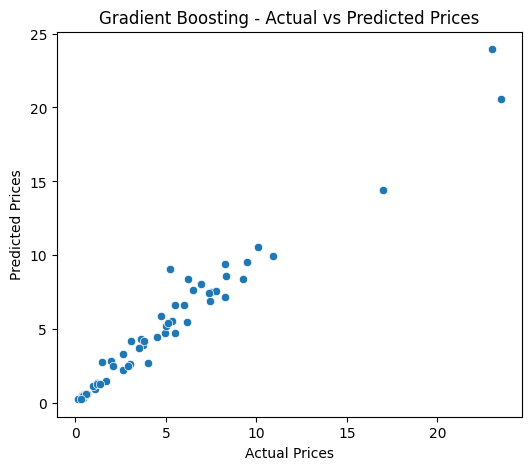

In [22]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"{name} - Actual vs Predicted Prices")
plt.show()